# Laboratory Six

In [27]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import *
from qiskit.visualization import plot_histogram

from qiskit import QuantumRegister, ClassicalRegister

{'0': 836, '1': 188}


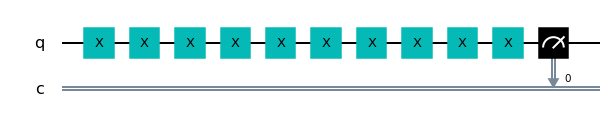

In [28]:
backend = Aer.get_backend('qasm_simulator')

def get_noise(p_meas, p_gate):
    error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

noise_model = get_noise(0.01,0.05)
N=5

qc3=QuantumCircuit(1,1)
for i in range(N):
    qc3.x(0)
    qc3.x(0)
qc3.measure(qc3.qregs[0], qc3.cregs[0])
counts = execute(qc3, backend, noise_model=noise_model).result().get_counts()

print(counts)
qc3.draw('mpl')

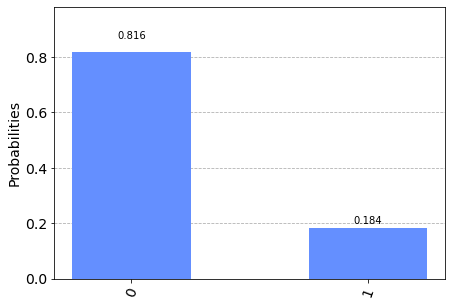

In [29]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048

plot_histogram(counts)

Ten gates is a relatively small circuit. Try the same code with N=10. **Cut and paste the resulting histogram into your report.**

{'0': 698, '1': 326}


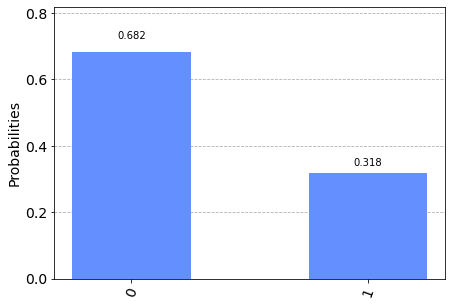

In [30]:
def get_noise(p_meas, p_gate):
    error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

noise_model = get_noise(0.01,0.05)
N=10

qc3=QuantumCircuit(1,1)
for i in range(N):
    qc3.x(0)
    qc3.x(0)
qc3.measure(qc3.qregs[0], qc3.cregs[0])
counts = execute(qc3, backend, noise_model=noise_model).result().get_counts()

print(counts)
backend = Aer.get_backend('qasm_simulator')
shots = 2048

plot_histogram(counts)

Now let’s repeat this process with a two qubit gate. The gate that we are going to use is cx, and again we will use them in pairs so the circuit is easy to scale. The circuit for this is shown below when N=5. Note the use of the barrier() function. The barrier() function doesn’t change what’s being computed, but has two purposes. First, it makes the display of the circuit look neater. Second, it prevents the circuit compiler from collapsing a sequence of gates into a single gate. This is important for us, since we are trying the measure the effect of error when the circuit is 3
scaled. If the compiler reduces our circuit to one or two gates, we are never going to be able to measure this effect.

{'00': 641, '01': 91, '10': 197, '11': 95}


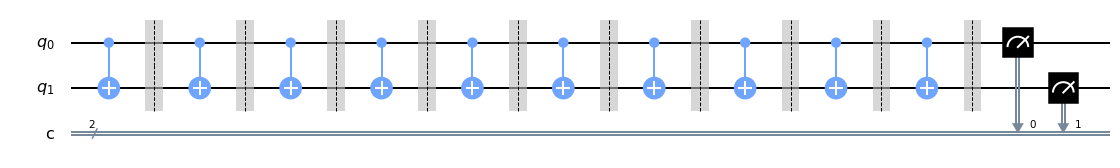

In [32]:
def get_noise(p_meas, p_gate):
    error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

noise_model = get_noise(0.01,0.05)
N=5

qc4=QuantumCircuit(2,2)
for i in range(N):
    qc4.cx(0,1)
    qc4.barrier()
    qc4.cx(0,1)
    qc4.barrier()
    
qc4.measure(qc4.qregs[0], qc4.cregs[0])
counts = execute(qc4, backend, noise_model=noise_model).result().get_counts()

print(counts)
plot_histogram(counts)
qc4.draw('mpl')

Plotting the results of this circuit gives the following result

{'00': 641, '01': 91, '10': 197, '11': 95}


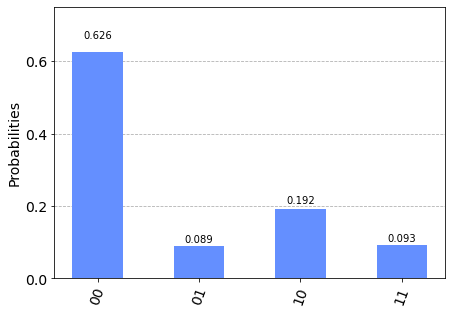

In [33]:
print(counts)
backend = Aer.get_backend('qasm_simulator')
shots = 2048

plot_histogram(counts)

In this case we are getting a significant amount of error. Even the first bit, which has the value |1> throughout the circuit has its value changed over 20% of the time. Increase the value of N to 10 and run the circuit. **Cut and paste the results into your report. This doesn’t look very promising.**

{'00': 410, '01': 174, '10': 251, '11': 189}


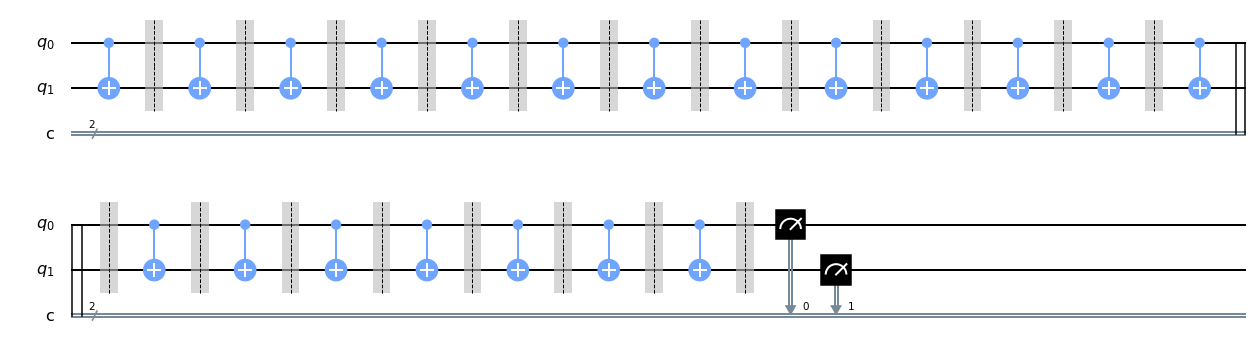

In [34]:
def get_noise(p_meas, p_gate):
    error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

noise_model = get_noise(0.01,0.05)
N=10

qc4=QuantumCircuit(2,2)
for i in range(N):
    qc4.cx(0,1)
    qc4.barrier()
    qc4.cx(0,1)
    qc4.barrier()
    
qc4.measure(qc4.qregs[0], qc4.cregs[0])
counts = execute(qc4, backend, noise_model=noise_model).result().get_counts()

print(counts)
plot_histogram(counts)
qc4.draw('mpl')

{'00': 410, '01': 174, '10': 251, '11': 189}


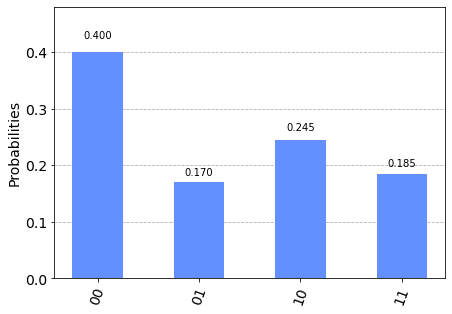

In [35]:
print(counts)
backend = Aer.get_backend('qasm_simulator')
shots = 2048

plot_histogram(counts)

#### Repetition codes
One way of reducing errors is to repeat the qubits. For example, instead of using one qubit for the computation, we could use three for the same computation. That is, we repeat the computation three times in parallel with three qubits. If one qubit is wrong and the other two are right, we can still use a majority vote to obtain the correct result. If we want to be surer of the result, we just increase the number of qubits. We always want to have an odd number of qubits so there are no tie results. This is the basic idea behind most of the error reduction techniques in quantum computing.
To see how this works we will examine two simple circuits. The first circuit has three qubits, each of which is initialized to |0>. This circuit is simulated with qasm with a noise model to give:

{'000': 998, '001': 8, '010': 15, '100': 3}


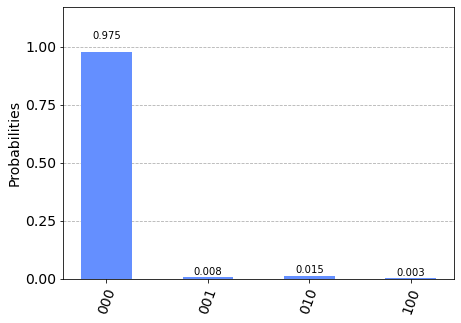

In [20]:
noise_model = get_noise(0.01, 0.01)

qc0 = QuantumCircuit(3,3,name='0') # initialize circuit with three qubits in the 0 state

qc0.measure(qc0.qregs[0],qc0.cregs[0]) # measure the qubits

# run the circuit with th noise model and extract the counts
backend = Aer.get_backend('qasm_simulator')
counts = execute( qc0, backend,noise_model=noise_model).result().get_counts()

print(counts)
plot_histogram(counts)

Note that we have a very high probability of measuring the correct result. We can do the same thing with the qubits initialized to |1>. This requires an extra gate for each qubit, so the probability of the correct result will be lower.
For the report take the |1> case and increase the number of qubits to 5. How does this impact the probability of getting the correct answer? **Cut and paste your results into your laboratory report.**

{'00000': 970, '00001': 19, '10000': 8, '10010': 1, '00010': 5, '00100': 11, '01000': 9, '01001': 1}


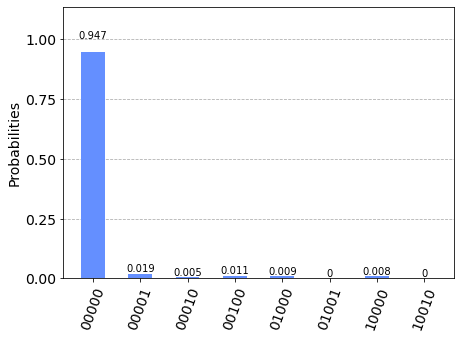

In [25]:
noise_model = get_noise(0.01, 0.01)

qc0 = QuantumCircuit(5,5,name='0') # initialize circuit with three qubits in the 0 state

qc0.measure(qc0.qregs[0],qc0.cregs[0]) # measure the qubits

# run the circuit with th noise model and extract the counts
backend = Aer.get_backend('qasm_simulator')
counts = execute( qc0, backend,noise_model=noise_model).result().get_counts()

print(counts)
plot_histogram(counts)

There are more sophisticated techniques than majority count, but we won’t go into them here.

{'010': 2, '011': 10, '101': 15, '110': 21, '111': 976}


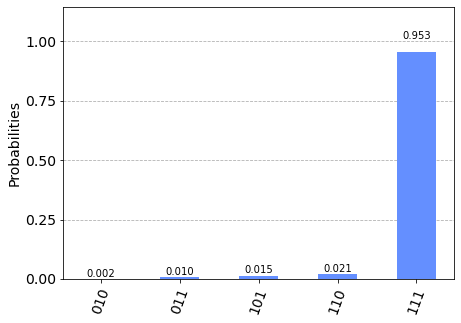

In [26]:
qc1 = QuantumCircuit(3, 3, name='0') # initialize circuit with three qubits in the 0 state
qc1.x(qc1.qregs[0]) # flip each 0 to 1

qc1.measure(qc1.qregs[0],qc1.cregs[0]) # measure the qubits

# run the circuit with th noise model and extract the counts
backend = Aer.get_backend('qasm_simulator')
counts = execute( qc1, backend,noise_model=noise_model).result().get_counts()

print(counts)
plot_histogram(counts)

#### Measuring Errors in Circuit

We know that errors will occur in our circuits, and we know how to detect these errors, but how can we fix them? Next week we will examine that issue, but there is one thing we need before we can get there. We have long circuits and errors accumulate in these circuits. We would like to fix these errors soon after they occur instead of at the end of the circuit. In order to do this, we need to detect errors in the middle of the circuit. The obvious solution is to measure the qubits in the middle of the circuit, but this will cause the qubit state to collapse and it will be useless for the rest of the computation.
The solution is to have an extra qubit that we can measure that is not part of the computation. But this qubit must somehow depend upon the other qubits in the circuit, so it can detect errors. We will use a 2 qubit code for this to keep the circuit simple, but it can be efficiently extended to an arbitrary number of qubits. We will use the following circuit for this.
The third qubit in the circuit is the one that will be measured. Note, that it’s the target of cx gates from the other two qubits.

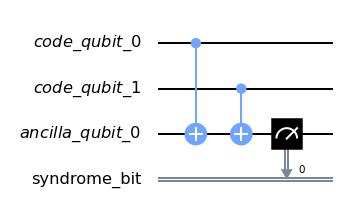

In [38]:
cq = QuantumRegister(2,'code_qubit')
lq = QuantumRegister(1,'ancilla_qubit')
sb = ClassicalRegister(1,'syndrome_bit')
qc = QuantumCircuit(cq,lq,sb)
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
qc.measure(lq,sb)
qc.draw('mpl')

To see how this circuit behaves we will do a sequence of experiments. Start with both the code qubits being |0> and simulate the circuit:

In [39]:
qc_init = QuantumCircuit(cq)
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc_init+qc, backend).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


The value zero is measured. Now let’s put both of the qubits in the |1> state:

In [40]:
qc_init = QuantumCircuit(cq)
qc_init.x(cq)
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc_init+qc, backend).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


Next put the qubits into the superimposed state $\frac{1}{\sqrt{2}}$ (|00⟩+|11⟩) and we get the following:

In [41]:
qc_init = QuantumCircuit(cq)
qc_init.h(cq[0])
qc_init.cx(cq[0],cq[1])
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc_init+qc, backend).result().get_counts()
print('Results:',counts)

Results: {'0': 1024}


So, for |00> and |11>, plus any combination of them we will always get the result zero.
Now let’s see what happens when we use the state |01>. In the case of a repetition code this would be an error:

In [42]:
qc_init = QuantumCircuit(cq)
qc_init.x(cq[0])
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc_init+qc, backend).result().get_counts()
print('Results:',counts)

Results: {'1': 1024}


The same thing happens for |10> and any superposition of these states. Thus, we have a way of detecting errors in the middle of our circuits without effecting the computation.